In [1]:
import numpy as np
import cv2
from skimage.io import imread
from skimage.segmentation import slic, mark_boundaries
import pygast
import pygast_detector as pd
import matplotlib.pyplot as plt

reload(pd)

%matplotlib inline

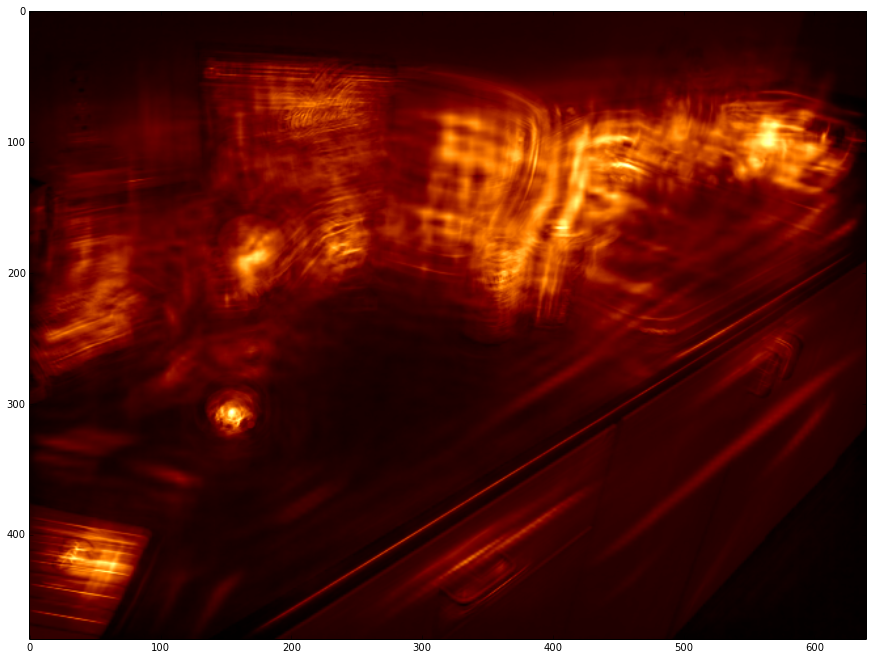

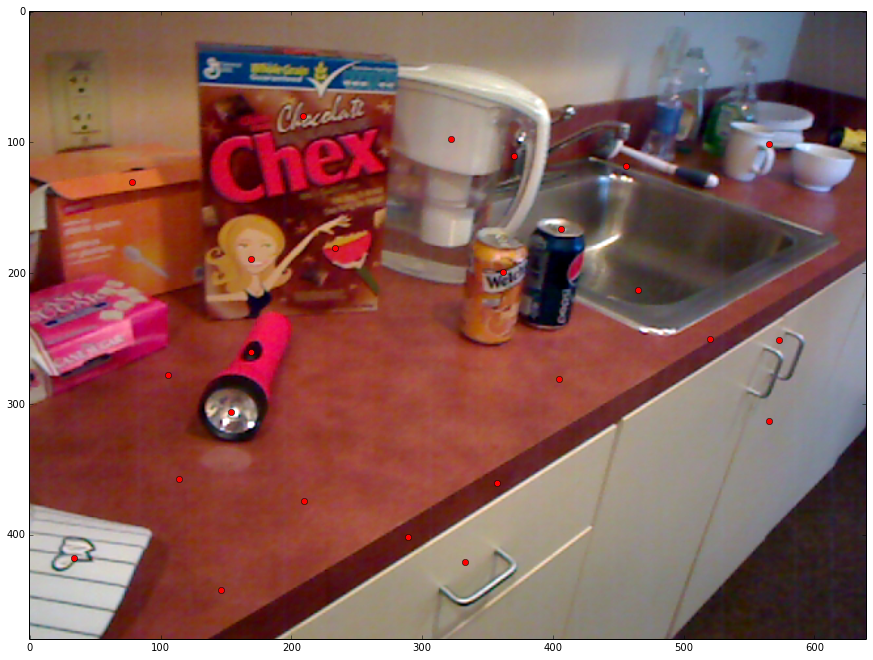

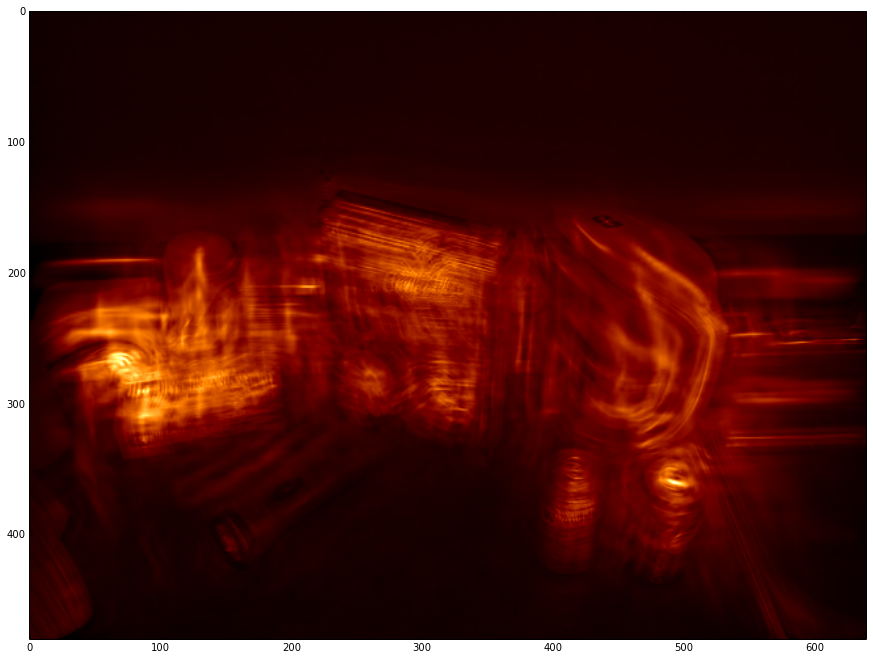

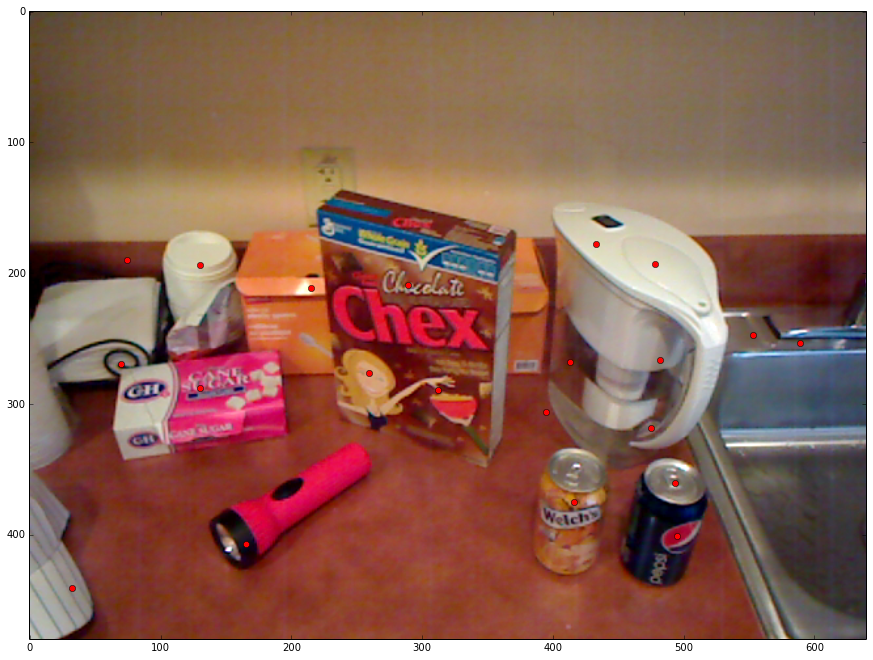

In [37]:
img0 = imread("/home/jlowens/Downloads/rgbd-scenes/kitchen_small/kitchen_small_1/kitchen_small_1_100.png")
img1 = imread("/home/jlowens/Downloads/rgbd-scenes/kitchen_small/kitchen_small_1/kitchen_small_1_70.png")
img2 = imread("/home/jlowens/Downloads/rgbd-scenes/kitchen_small/kitchen_small_1/kitchen_small_1_102.png")
img3 = imread("/home/jlowens/Downloads/rgbd-scenes/kitchen_small/kitchen_small_1/kitchen_small_1_103.png")
img4 = imread("/home/jlowens/Downloads/rgbd-scenes/kitchen_small/kitchen_small_1/kitchen_small_1_104.png")

imgs = [img0, img1, img2, img3, img4]

gast = pd.GASTDetector(levels=3, adjust_contrast=False)

def plot_detections(img, sym):
    alpha = 0.2
    beta = 1.0-alpha
    gamma = 0.0
    gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blend = cv2.addWeighted(gimg.astype(np.float32)/255.0, alpha, sym[1], beta, gamma)
    plt.figure(figsize=(15,15))
    plt.imshow(blend, cmap="afmhot")
    plt.figure(figsize=(15,15))
    plt.imshow(img)
    plt.autoscale(False)
    plt.plot(sym[0][:,1], sym[0][:,0], 'ro')

for im in imgs[:2]:
    sym = gast.detect(im, 30)
    plot_detections(im, sym)


255


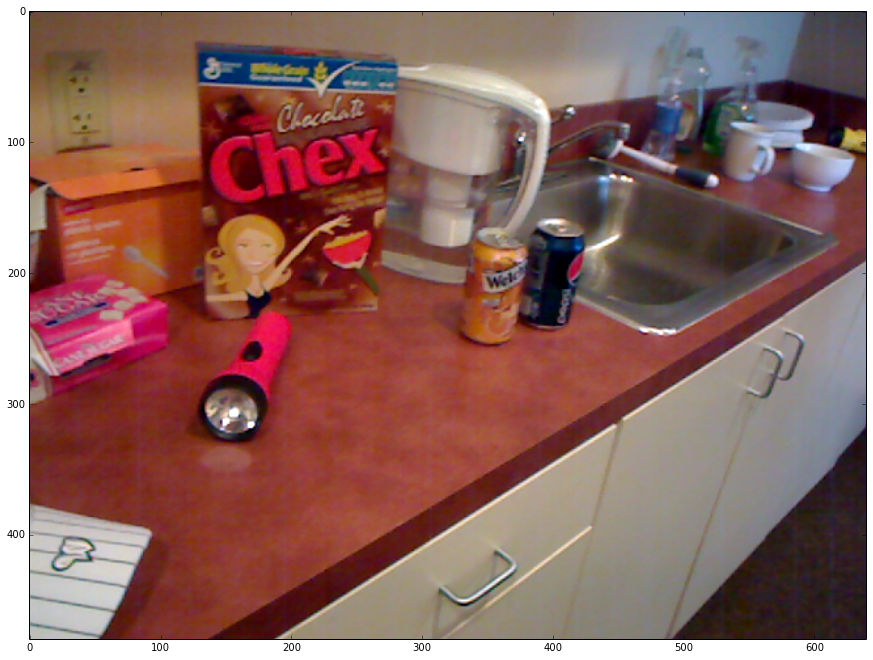

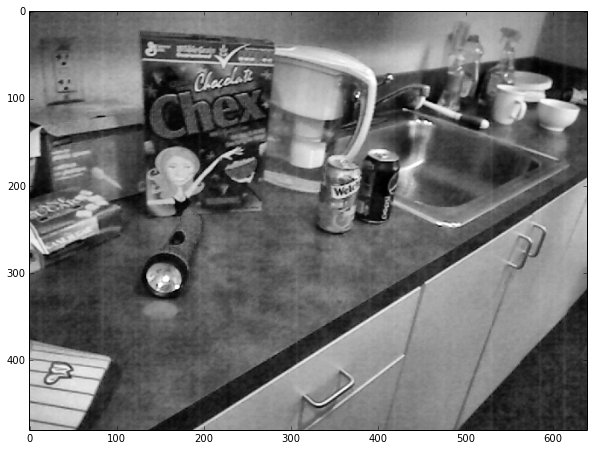

In [43]:
img = imread("/home/jlowens/Downloads/rgbd-scenes/kitchen_small/kitchen_small_1/kitchen_small_1_100.png")
segs = slic(img,n_segments=512,compactness=20.0)
gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img = imread("/usr/local/src/datasets/kitti/sequences/06/image_0/000700.png")
#gimg = img
plt.figure(figsize=(15,15))
plt.imshow(img)

#plt.figure(figsize=(15,15))
#plt.imshow(mark_boundaries(img, segs))

clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(8,8))
gimg = clahe.apply(gimg)
#gimg = cv2.bilateralFilter(gimg, 10, 10, 50)
#gimg = cv2.medianBlur(gimg, 5)
plt.figure(figsize=(10,10))
plt.imshow(gimg, cmap="gray")
print np.amax(gimg)

In [44]:
sym = pygast.Symmetry()

CPU times: user 1.9 ms, sys: 4.09 ms, total: 5.99 ms
Wall time: 5.9 ms
CPU times: user 2.24 ms, sys: 3.97 ms, total: 6.21 ms
Wall time: 6.29 ms
CPU times: user 19.4 ms, sys: 0 ns, total: 19.4 ms
Wall time: 19.3 ms
CPU times: user 62.3 ms, sys: 7.95 ms, total: 70.2 ms
Wall time: 70.2 ms
0.27693
0.310908
0.567838
0.379234


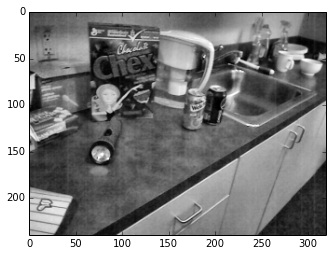

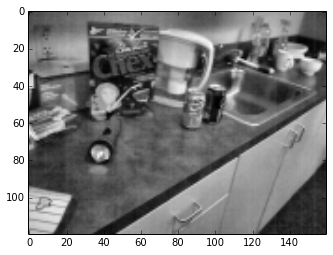

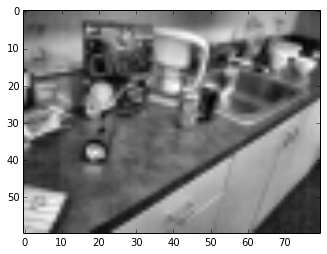

In [45]:
#gimg2 = cv2.resize(cv2.GaussianBlur(gimg), (320,240))
#gimg3 = cv2.resize(gimg, (160,120))
# gimg2 = cv2.pyrDown(gimg)#, (320,240))
# gimg3 = cv2.pyrDown(gimg2)#, (160,120))
# gimg4 = cv2.pyrDown(gimg3)#, (80,60))
gimg2 = cv2.resize(gimg, (gimg.shape[1]/2, gimg.shape[0]/2))
gimg3 = cv2.resize(gimg2, (gimg2.shape[1]/2, gimg2.shape[0]/2))
gimg4 = cv2.resize(gimg3, (gimg3.shape[1]/2, gimg3.shape[0]/2))


plt.figure()
plt.imshow(gimg2, cmap="gray")
plt.figure()
plt.imshow(gimg3, cmap="gray")
plt.figure()
plt.imshow(gimg4, cmap="gray")

smag = np.zeros(gimg.shape, dtype=np.float32)
sdir = np.zeros(gimg.shape, dtype=np.float32)
smag2 = np.zeros(gimg2.shape, dtype=np.float32)
sdir2 = np.zeros(gimg2.shape, dtype=np.float32)
smag3 = np.zeros(gimg3.shape, dtype=np.float32)
sdir3 = np.zeros(gimg3.shape, dtype=np.float32)
smag4 = np.zeros(gimg4.shape, dtype=np.float32)
sdir4 = np.zeros(gimg4.shape, dtype=np.float32)

%time sym.transform(gimg4, smag4, sdir4, 7)
%time sym.transform(gimg3, smag3, sdir3, 7)
%time sym.transform(gimg2, smag2, sdir2, 7)
%time sym.transform(gimg, smag, sdir, 7)


print np.amax(smag4)
print np.amax(smag3)
print np.amax(smag2)
print np.amax(smag)


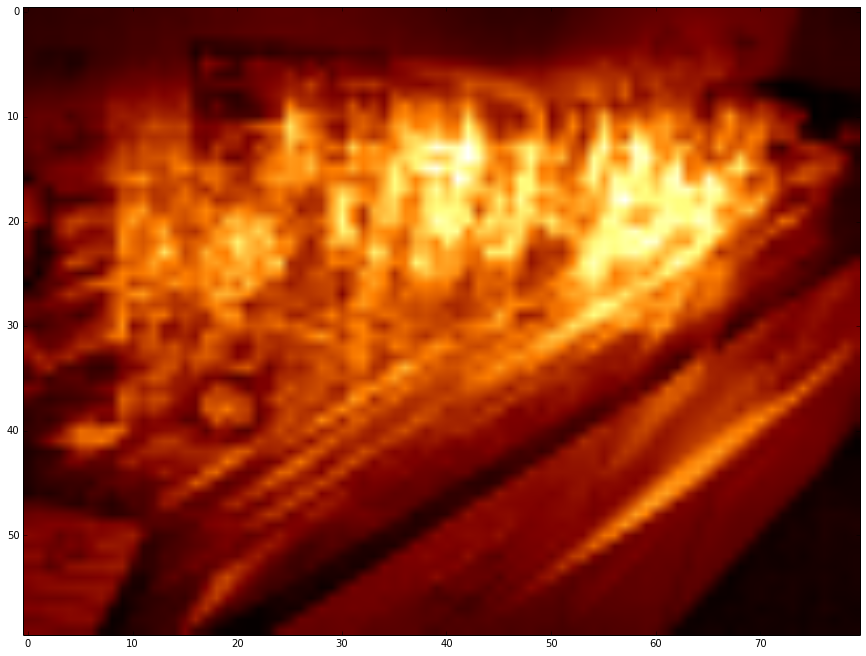

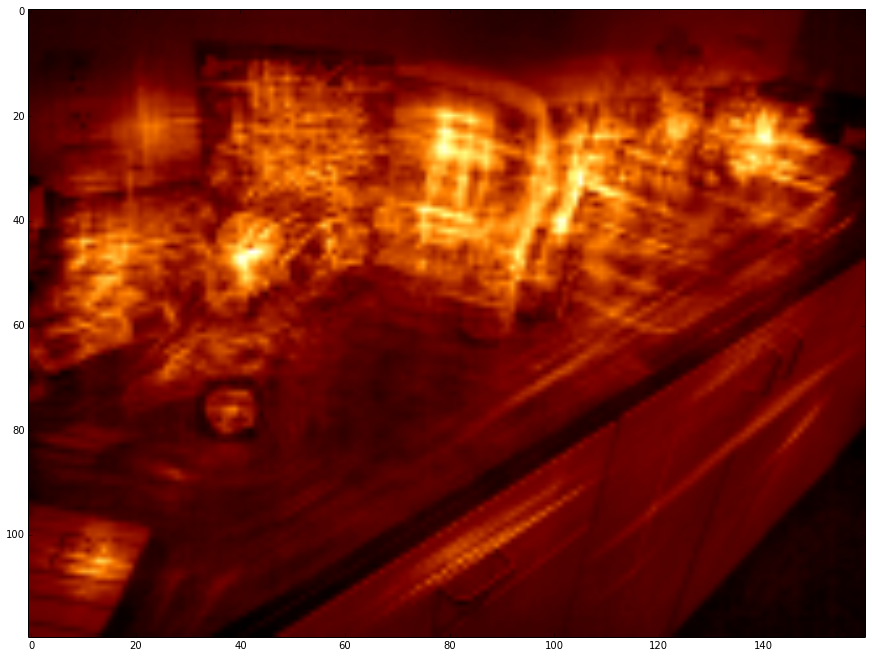

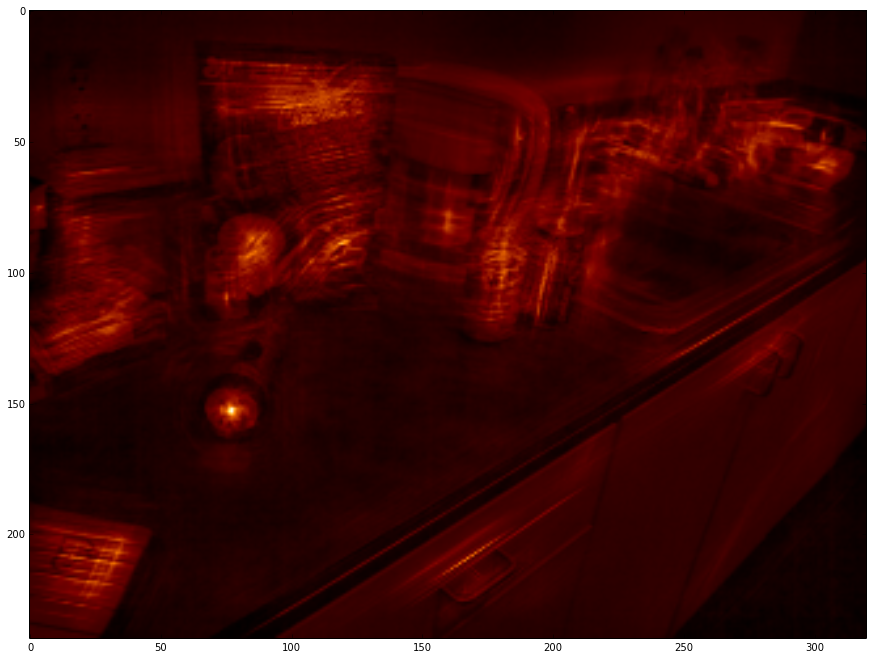

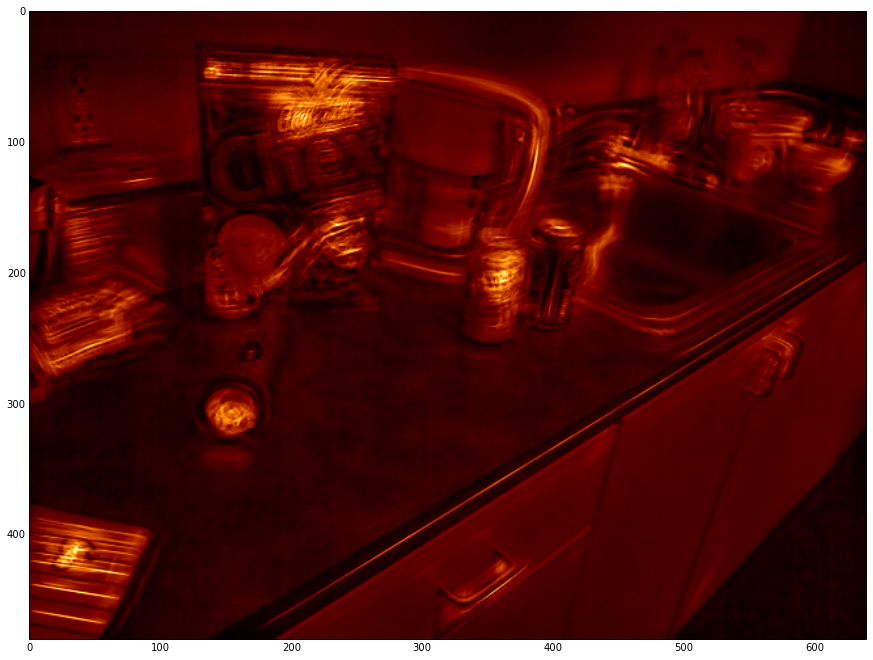

In [46]:
alpha = 0.1
beta = 1.0-alpha
gamma = 0.0
blend4 = cv2.addWeighted(gimg4.astype(np.float32)/255.0, alpha, smag4, beta, gamma)
blend3 = cv2.addWeighted(gimg3.astype(np.float32)/255.0, alpha, smag3, beta, gamma)
blend2 = cv2.addWeighted(gimg2.astype(np.float32)/255.0, alpha, smag2, beta, gamma)
blend = cv2.addWeighted(gimg.astype(np.float32)/255.0, alpha, smag, beta, gamma)


plt.figure(figsize=(15,15))
plt.imshow(blend4, cmap="afmhot")
plt.figure(figsize=(15,15))
plt.imshow(blend3, cmap="afmhot")
plt.figure(figsize=(15,15))
plt.imshow(blend2, cmap="afmhot")
plt.figure(figsize=(15,15))
plt.imshow(blend, cmap="afmhot")

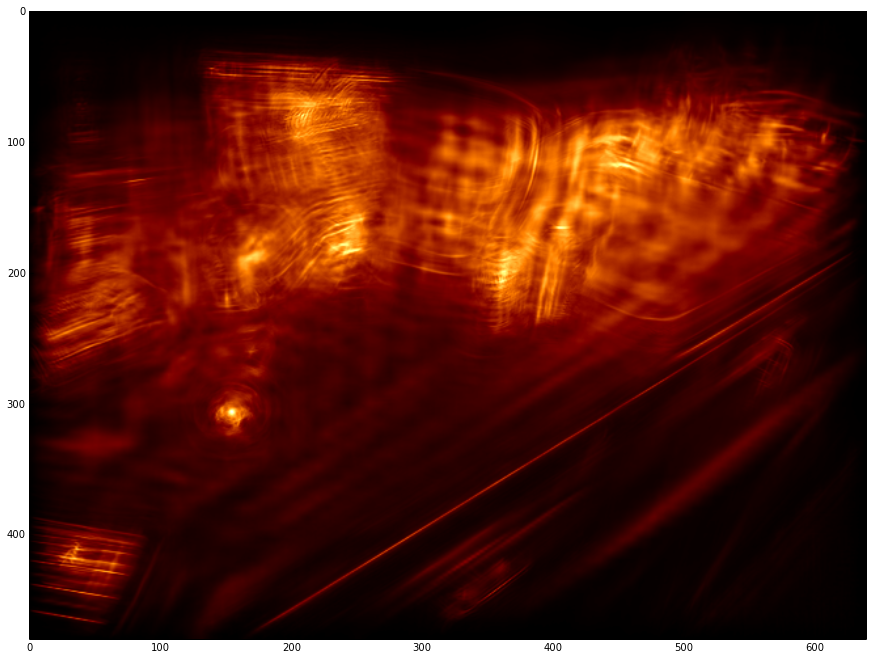

In [31]:
#out4 = np.zeros_like(smag)
#out3 = np.zeros_like(smag)
#out2 = np.zeros_like(smag)
maxes = np.array([np.amax(smag), np.amax(smag2), np.amax(smag3), np.amax(smag4)])
scale = np.amax(maxes)

full_shape = gimg.shape[::-1]
out4 = cv2.resize(smag4,full_shape)
out4 = out4 / scale
out3 = cv2.resize(smag3,full_shape)
out3 = out3 / scale
out2 = cv2.resize(smag2,full_shape)
out2 = out2 / scale
out = smag / scale

collected = out4 + out3 + out2 + out
#collected = collected * .25
plt.figure(figsize=(15,15))
plt.imshow(collected, cmap="afmhot")

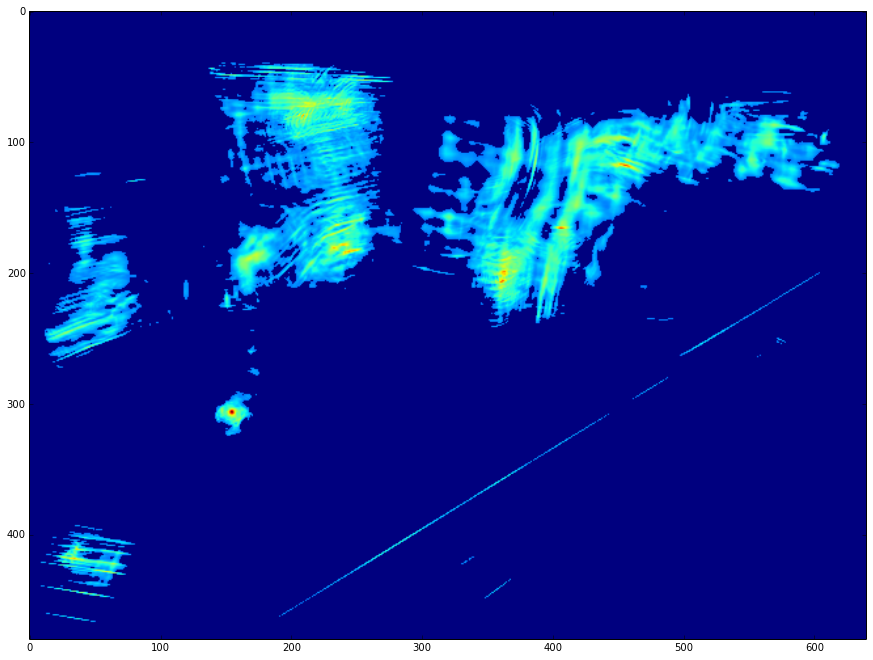

In [28]:
ret, tsym = cv2.threshold(collected, 0.3, 0.0, cv2.THRESH_TOZERO)
plt.figure(figsize=(15,15))
plt.imshow(tsym)

(243, 2)


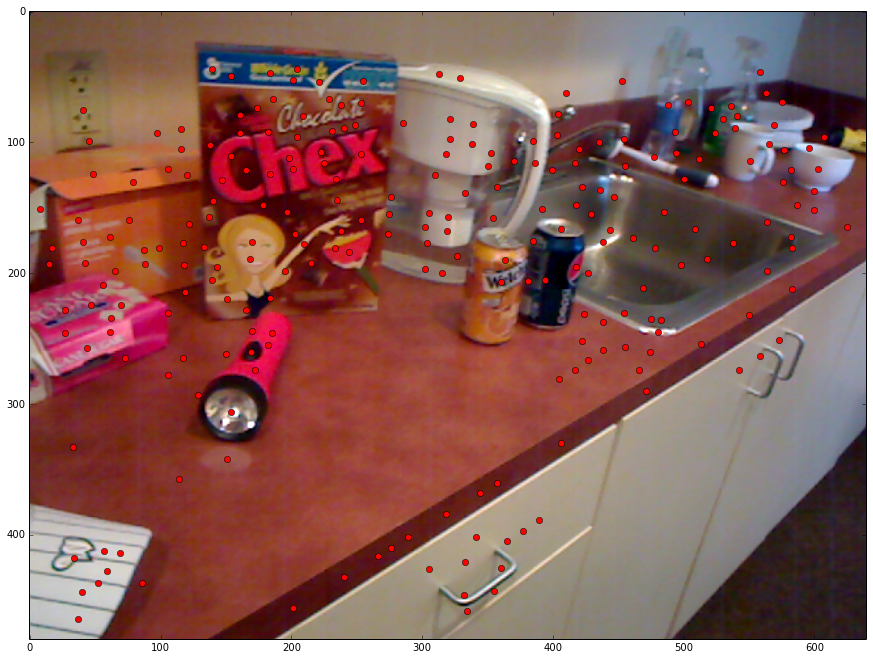

In [30]:
from skimage.feature import peak_local_max

max_coords = peak_local_max(collected, min_distance=7)
print max_coords.shape
plt.figure(figsize=(15,15))
#plt.imshow(mark_boundaries(img, segs),cmap="gray")
plt.imshow(img, cmap="gray")
plt.autoscale(False)
plt.plot(max_coords[:,1], max_coords[:,0], 'ro')